In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv", parse_dates = ["Datetime"])
test_data = pd.read_csv("test.csv", parse_dates = ["Datetime"])
samplesubmission = pd.read_csv("SampleSubmission.csv")
train_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


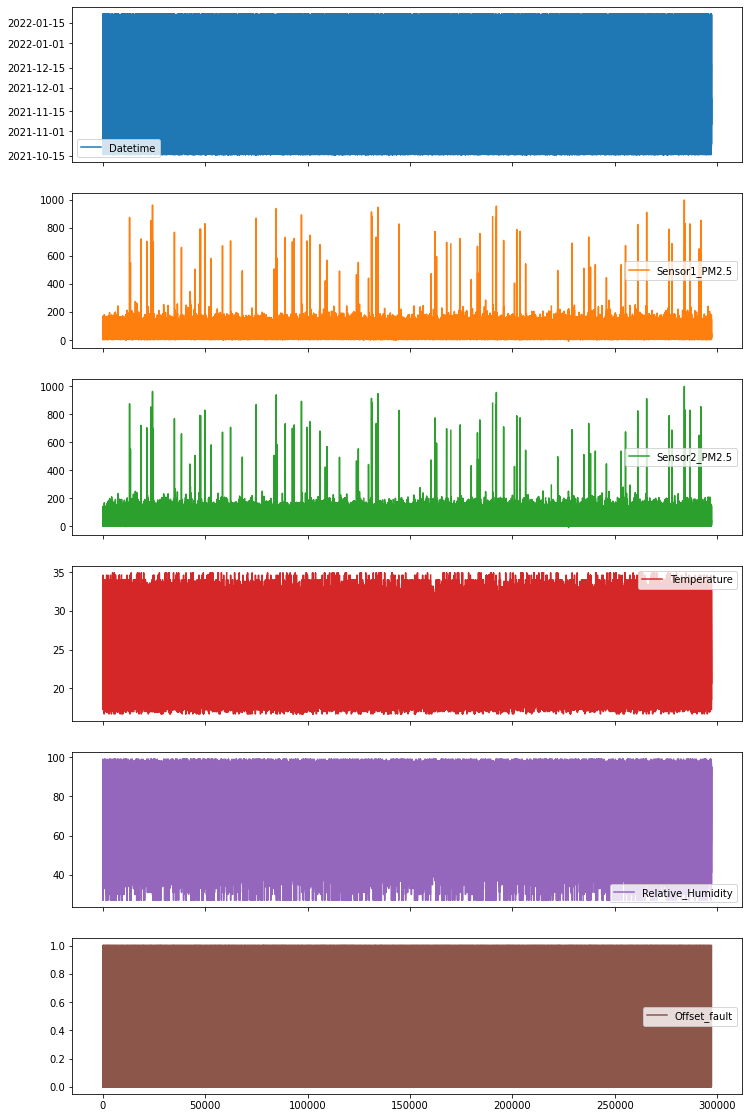

In [3]:
train_data.plot(subplots = True, figsize = (12, 20))
plt.show()

In [4]:
train_data.isnull()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
297172,False,False,False,False,False,False,False
297173,False,False,False,False,False,False,False
297174,False,False,False,False,False,False,False
297175,False,False,False,False,False,False,False


In [5]:
train_data.fillna(0).head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0


In [6]:
test_data.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


In [7]:
test_data.isnull()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,False,False,False,False,False,False
1,False,False,False,False,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
127356,False,False,False,False,True,True
127357,False,False,False,False,True,True
127358,False,False,False,False,True,True
127359,False,False,False,False,True,True


In [8]:
test_data.fillna(0).head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,0.0,0.0
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0


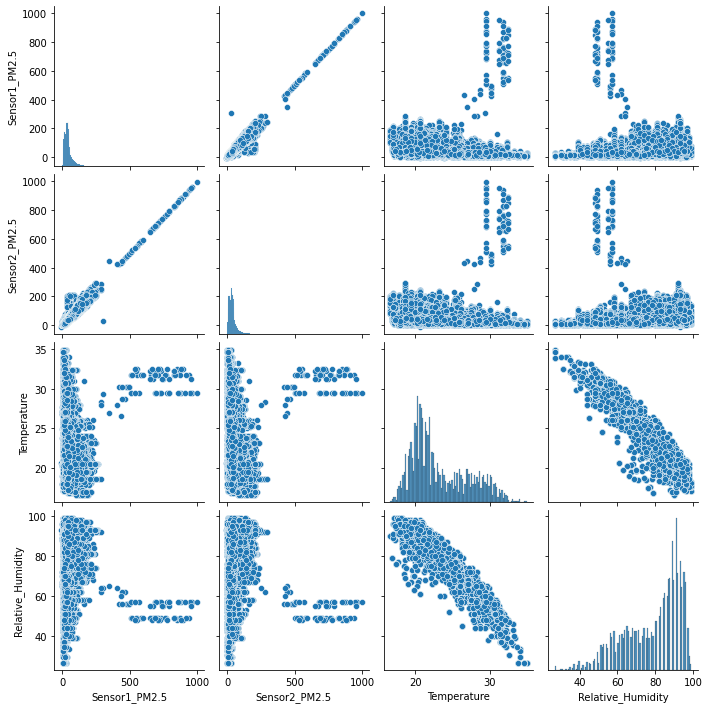

In [9]:
train_cols = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity"]
sns.pairplot(train_data[train_cols], kind = "scatter")
plt.show()

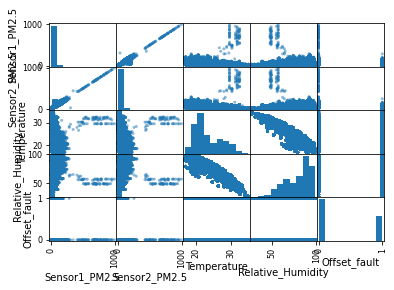

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(train_data)
plt.show()

Sensor1_PM2.5           AxesSubplot(0.125,0.657941;0.227941x0.222059)
Sensor2_PM2.5        AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Temperature          AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Relative_Humidity       AxesSubplot(0.125,0.391471;0.227941x0.222059)
Offset_fault         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
dtype: object

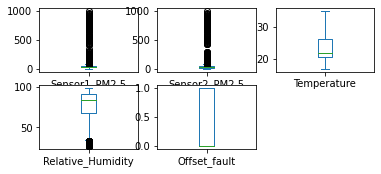

In [11]:
train_data.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False)

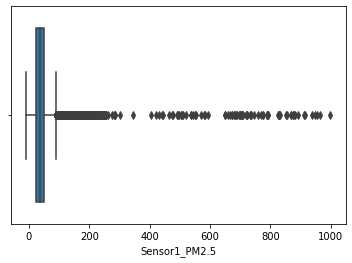

In [12]:
num_cols = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity"]
sns.boxplot(x = train_data["Sensor1_PM2.5"])
plt.show()

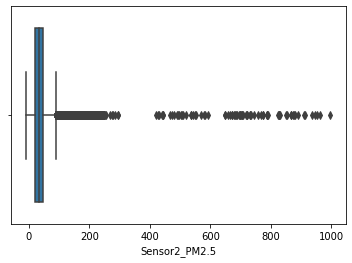

In [13]:
sns.boxplot(x = train_data["Sensor2_PM2.5"])
plt.show()

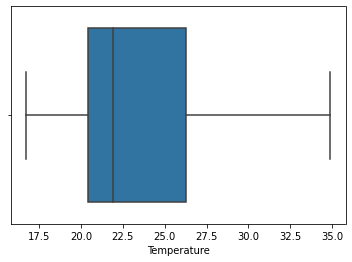

In [14]:
sns.boxplot(x = train_data["Temperature"])
plt.show()

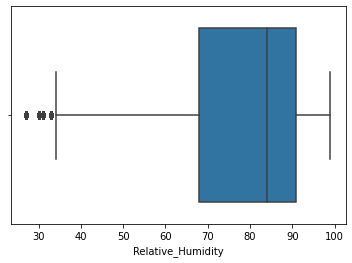

In [15]:
sns.boxplot(x = train_data["Relative_Humidity"])
plt.show()

In [16]:
print("train_data shape: " + str(train_data.shape))
print("test_data shape: " + str(test_data.shape))
print("samplesubmission shape: " + str(samplesubmission.shape))

train_data shape: (297177, 7)
test_data shape: (127361, 6)
samplesubmission shape: (127361, 2)


In [17]:
import warnings
warnings.filterwarnings('ignore')
train_data.describe(include = "all")

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-10-15 16:00:31,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-21 07:34:57,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.751195,38.183018,23.316554,78.653623,0.371072
std,NaN,NaN,28.526182,28.647761,3.836971,14.772725,0.483092
min,NaN,NaN,-9.450000,-9.700000,16.700000,27.000000,0.000000
25%,NaN,NaN,22.430000,19.520000,20.400000,68.000000,0.000000


In [18]:
train_data.isnull().sum().any(), test_data.isnull().sum().any()

(True, True)

In [19]:
train_data.fillna(0)

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0
...,...,...,...,...,...,...,...
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,36.40,37.77,28.6,62.0,0
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,50.12,40.63,21.6,86.0,1
297174,ID_0OAQMV7USTI4,2021-11-05 01:27:31,53.68,45.23,20.2,94.0,1
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,96.45,114.67,20.6,93.0,0


In [20]:
train_data.duplicated().any(), test_data.duplicated().any()

(False, False)

In [21]:
train_data['Datetime_day'] = train_data.Datetime.dt.day
train_data['Datetime_month'] = train_data.Datetime.dt.month
train_data['Datetime_year'] = train_data.Datetime.dt.year
train_data['Datetime_hour'] = train_data.Datetime.dt.hour
train_data[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2021-11-03 04:06:31,3,11,2021,4
1,2021-11-08 18:43:23,8,11,2021,18
2,2021-11-07 09:50:33,7,11,2021,9
3,2022-01-01 18:55:15,1,1,2022,18
4,2021-11-05 22:23:48,5,11,2021,22


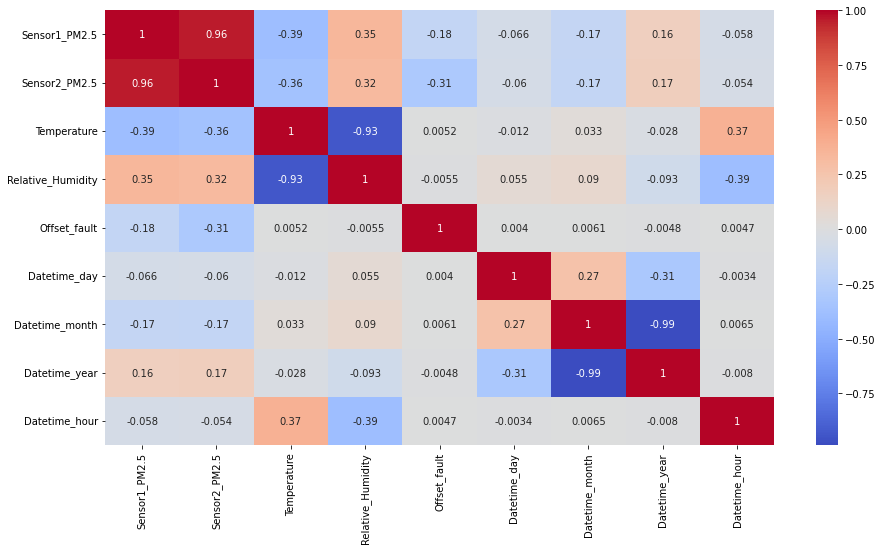

In [22]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [23]:
train_data.corr()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
Sensor1_PM2.5,1.000000,0.959253,-0.390342,0.345020,-0.176257,-0.065845,-0.165492,0.161995,-0.058490
Sensor2_PM2.5,0.959253,1.000000,-0.363295,0.318470,-0.309739,-0.060088,-0.172149,0.172634,-0.054364
Temperature,-0.390342,-0.363295,1.000000,-0.933608,0.005218,-0.012197,0.033259,-0.027746,0.374180
Relative_Humidity,0.345020,0.318470,-0.933608,1.000000,-0.005508,0.054963,0.090350,-0.093323,-0.389953
Offset_fault,-0.176257,-0.309739,0.005218,-0.005508,1.000000,0.003973,0.006119,-0.004846,0.004706
Datetime_day,-0.065845,-0.060088,-0.012197,0.054963,0.003973,1.000000,0.269636,-0.313015,-0.003369
Datetime_month,-0.165492,-0.172149,0.033259,0.090350,0.006119,0.269636,1.000000,-0.986940,0.006486
Datetime_year,0.161995,0.172634,-0.027746,-0.093323,-0.004846,-0.313015,-0.986940,1.000000,-0.008027
Datetime_hour,-0.058490,-0.054364,0.374180,-0.389953,0.004706,-0.003369,0.006486,-0.008027,1.000000


In [24]:
test_data['Datetime_day'] = test_data.Datetime.dt.day
test_data['Datetime_month'] = test_data.Datetime.dt.month
test_data['Datetime_year'] = test_data.Datetime.dt.year
test_data['Datetime_hour'] = test_data.Datetime.dt.hour
test_data[['Datetime', 'Datetime_day', 'Datetime_month', 'Datetime_year', 'Datetime_hour']].head()

,Datetime,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
0,2022-01-28 08:49:41,28,1,2022,8
1,2022-02-16 21:30:17,16,2,2022,21
2,2022-01-24 17:57:18,24,1,2022,17
3,2022-01-31 07:07:09,31,1,2022,7
4,2022-01-31 00:37:05,31,1,2022,0


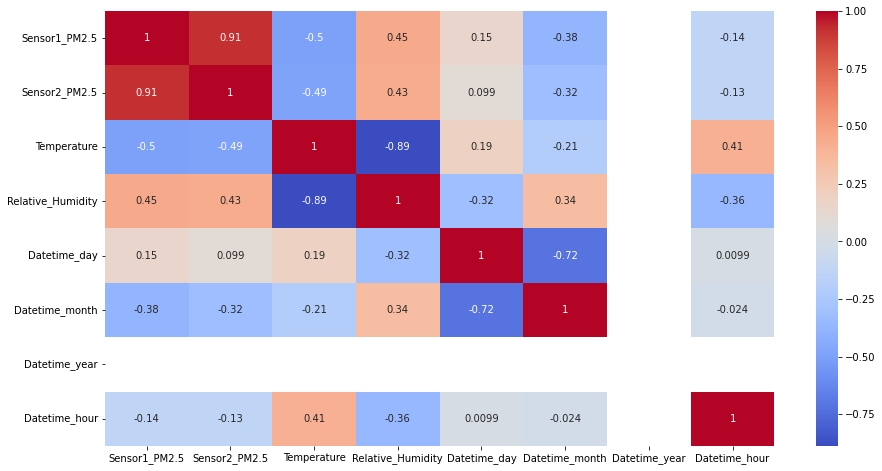

In [25]:
plt.figure(figsize = (15, 8))
sns.heatmap(test_data.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [26]:
test_data.corr()

,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour
Sensor1_PM2.5,1.000000,0.911543,-0.501972,0.450077,0.146440,-0.380368,NaN,-0.135209
Sensor2_PM2.5,0.911543,1.000000,-0.485822,0.433889,0.099003,-0.322300,NaN,-0.131932
Temperature,-0.501972,-0.485822,1.000000,-0.888026,0.186026,-0.205140,NaN,0.411004
Relative_Humidity,0.450077,0.433889,-0.888026,1.000000,-0.317546,0.341214,NaN,-0.360610
Datetime_day,0.146440,0.099003,0.186026,-0.317546,1.000000,-0.715836,NaN,0.009885
Datetime_month,-0.380368,-0.322300,-0.205140,0.341214,-0.715836,1.000000,NaN,-0.023892
Datetime_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Datetime_hour,-0.135209,-0.131932,0.411004,-0.360610,0.009885,-0.023892,NaN,1.000000


In [27]:
train_feats = ["Sensor1_PM2.5", "Sensor2_PM2.5", "Temperature", "Relative_Humidity", "Datetime_day", "Datetime_month", "Datetime_year", "Datetime_hour"]
X = train_data[train_feats].fillna(0)
y = train_data["Offset_fault"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
mlp = MLPClassifier(max_iter = 500, activation = 'relu')
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=500)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(208023, 8)
(208023,)
(89154, 8)
(89154,)


In [29]:
p_pred = mlp.predict_proba(X_train)
y_pred = mlp.predict(X_test)

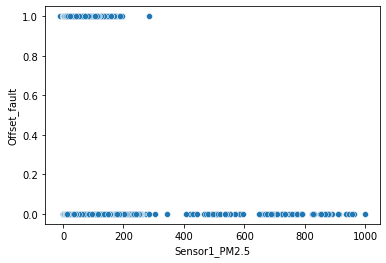

In [30]:
sns.scatterplot(x = train_data["Sensor1_PM2.5"], y = train_data["Offset_fault"])
plt.show()

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[55746   220]
 [18471 14717]]


Text(0.5, 15.0, 'Predicted label')

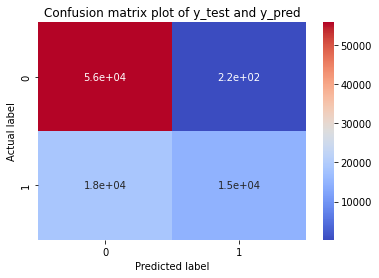

In [32]:
sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = "coolwarm")
plt.title("Confusion matrix plot of y_test and y_pred")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [33]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Report" + str(report))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))

Report              precision    recall  f1-score   support

           0       0.75      1.00      0.86     55966
           1       0.99      0.44      0.61     33188

    accuracy                           0.79     89154
   macro avg       0.87      0.72      0.73     89154
weighted avg       0.84      0.79      0.77     89154

Accuracy: 0.790351526571999
Precision: 0.9852714735221263


In [34]:
dt_model = DecisionTreeClassifier(min_samples_split = 15)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=15)

In [35]:
y_pred = dt_model.predict(X_test)

In [36]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(208023, 8)
(208023,)
(89154, 8)
(89154,)


In [37]:
print("Report" + str(report))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))

Report              precision    recall  f1-score   support

           0       0.75      1.00      0.86     55966
           1       0.99      0.44      0.61     33188

    accuracy                           0.79     89154
   macro avg       0.87      0.72      0.73     89154
weighted avg       0.84      0.79      0.77     89154

Accuracy: 0.931758530183727
Precision: 0.9128434777310669


In [38]:
sgd = SGDClassifier(loss = "modified_huber", shuffle = True, random_state = 101)
sgd.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', random_state=101)

In [39]:
y_pred = sgd.predict(X_test)

In [40]:
print("Report" + str(report))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Precision: " + str(precision_score(y_test, y_pred)))

Report              precision    recall  f1-score   support

           0       0.75      1.00      0.86     55966
           1       0.99      0.44      0.61     33188

    accuracy                           0.79     89154
   macro avg       0.87      0.72      0.73     89154
weighted avg       0.84      0.79      0.77     89154

Accuracy: 0.8857819054669448
Precision: 0.8863918841748127
